<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/midterm_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the weatherHistory.csv into a data frame. How many observations do we have? 

96453

In [100]:
import numpy as np
import pandas as pd
import operator
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("drive/MyDrive/DATA 310/weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


2. In the weatherHistory.csv data how many features are just nominal variables?

Summary, Precip Type, Daily Summary == 3 features

3. If we want to use all the unstandardized observations for 'Temperature (C)' and predict the Humidity the resulting root mean squared error is (just copy the first 4 decimal places):

In [67]:
temp = df["Temperature (C)"]
humidity = df["Humidity"]
temp_df = df[["Temperature (C)"]]
humidity_df = df[["Humidity"]]

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [178]:
temps = temp.values
humidities = humidity.values

In [179]:
model = LinearRegression()
model.fit(temps.reshape(-1,1), humidities)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
y_pred = model.predict(temps.reshape(-1,1))
mse = mean_squared_error(temp, humidity)
rmse = mean_squared_error(humidities, y_pred, squared=False)
print(mse)
print(rmse)
#((temp - humidity) ** 2).mean()**.5

219.02046462804827
0.1514437964005473


4. If the input feature is the Temperature and the target is the Humidity and we consider 20-fold cross validations with random_state=2020, the Ridge model with alpha =0.1 and standardize the input train and the input test data. The average RMSE on the test sets is (provide your answer with the first 6 decimal places):

In [93]:
kf = KFold(n_splits=20, random_state=2020)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [103]:
X = np.array(df['Temperature (C)']).reshape(-1,1)
y = np.array(df['Humidity']).reshape(-1,1)
i = 0
PE = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  Xs_train = scale.fit_transform(X_train)
  Xs_test  = scale.transform(X_test)
  model = Ridge(alpha=0.1)
  model.fit(Xs_train, y_train)
  yhat =  model.predict(Xs_test)
  #residuals = y_test - yhat
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))
  print('Score:',np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

Score: 0.15243946139414918
Score: 0.1497134147114123
Score: 0.15174554826675243
Score: 0.15092143247918785
Score: 0.1518217611104383
Score: 0.15147821220668592
Score: 0.1513978836664639
Score: 0.15094448816388154
Score: 0.15228558027449265
Score: 0.15150817881118953
Score: 0.1520007677305962
Score: 0.15033627222044127
Score: 0.15228697781705297
Score: 0.15100633815098632
Score: 0.15026592257206808
Score: 0.15175917621636525
Score: 0.15306225069868734
Score: 0.15156939236668762
Score: 0.15169701401507518
Score: 0.150466516675432


0.1514353294774023

5. Suppose we want to use Random Forrest with 100 trees and max_depth=50 to predict the Humidity with the Apparent Temperature and we want to estimate the root mean squared error by using 10-cross validations (random_state=1693) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 6 decimal places):

In [104]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=100,max_depth=50)
kf = KFold(n_splits=10, random_state=1693)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [184]:
X = np.array(df['Apparent Temperature (C)']).reshape(-1,1)
y = np.array(df['Humidity']).reshape(-1,1)
i = 0
PE = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = RF_reg.fit(X_train,y_train.ravel())
  model.fit(X_train, y_train)
  yhat =  model.predict(X_test)
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

0.14429549270660708

6. Suppose we want use polynomial features of degree 6 and we want to predict the Humidity with the Apparent Temperature and we want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1693) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 5 decimal places):

In [185]:
polynomial_features= PolynomialFeatures(degree=6)
model = LinearRegression()
kf = KFold(n_splits=10, random_state=1693)
X = np.array(df['Apparent Temperature (C)'])#.reshape(-1,1)
y = np.array(df['Humidity'])#.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [186]:
MSE_train = []
MSE_test = []
RMSE_test = []
for idxtrain, idxtest in kf.split(X):
  x_train = X[idxtrain]
  x_test = X[idxtest]
  y_train = y[idxtrain]
  y_test  = y[idxtest]
  x_poly_train = polynomial_features.fit_transform(np.array(x_train).reshape(-1,1))
  x_poly_test = polynomial_features.fit_transform(np.array(x_test).reshape(-1,1))
  model.fit(x_poly_train,y_train)
  yhat_train = model.predict(x_poly_train)
  yhat_test = model.predict(x_poly_test)
  #MSE_train.append(mean_squared_error(y_train,yhat_train))
  #MSE_test.append(mean_squared_error(y_test,yhat_test))
  RMSE_test.append(np.sqrt(mean_squared_error(y_test,yhat_test)))

In [187]:
np.mean(RMSE_test)

0.14389279091847298

7. If the input feature is the Temperature and the target is the Humidity and we consider 10-fold cross validations with random_state=1234, the Ridge model with alpha =0.2. Inside the cross-validation loop standardize the input data. The average RMSE on the test sets is (provide your answer with the first 4 decimal places):

In [207]:
kf = KFold(n_splits=10, random_state=1234)
X = np.array(df['Temperature (C)']).reshape(-1,1)
y = np.array(df['Humidity']).reshape(-1,1)
i = 0
PE = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  Xs_train = scale.fit_transform(X_train)
  Xs_test  = scale.transform(X_test)
  model = Ridge(alpha=0.2)
  model.fit(Xs_train, y_train)
  yhat =  model.predict(Xs_test)
  #residuals = y_test - yhat
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))
  print('Score:',np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

Score: 0.15129905918930545
Score: 0.15271624353909277
Score: 0.15093773146411452
Score: 0.15200037775990952
Score: 0.15234740182125378
Score: 0.1514435249966898
Score: 0.15254452285599132
Score: 0.1507016367460954
Score: 0.15178978915816502
Score: 0.15178640924160164


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.15175666967722193

8. Suppose we use polynomial features of degree 6 and we want to predict the Temperature by using 'Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)' We want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1234) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 4 decimal places):

In [217]:
polynomial_features= PolynomialFeatures(degree=6)
model = LinearRegression()
kf = KFold(n_splits=10, random_state=1234)
y = np.array(df['Temperature (C)'])#.reshape(-1,1)
X = np.array(df[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']])#.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [219]:
MSE_train = []
MSE_test = []
RMSE_test = []
for idxtrain, idxtest in kf.split(X):
  x_train = X[idxtrain]
  x_test = X[idxtest]
  y_train = y[idxtrain]
  y_test  = y[idxtest]
  x_poly_train = polynomial_features.fit_transform(x_train)
  x_poly_test = polynomial_features.fit_transform(x_test)
  model.fit(x_poly_train,y_train)
  yhat_train = model.predict(x_poly_train)
  yhat_test = model.predict(x_poly_test)
  #MSE_train.append(mean_squared_error(y_train,yhat_train))
  #MSE_test.append(mean_squared_error(y_test,yhat_test))
  RMSE_test.append(np.sqrt(mean_squared_error(y_test,yhat_test)))

In [223]:
np.mean(RMSE_test)

6.188745982962139

9. Suppose we use Random Forest with 100 trees and max_depth=50 and we want to predict the Temperature by using 'Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)' We want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1234) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 4 decimal places):

In [224]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=100,max_depth=50)
kf = KFold(n_splits=10, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [225]:
y = np.array(df['Temperature (C)'])#.reshape(-1,1)
X = np.array(df[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']])#.reshape(-1,1)
i = 0
PE = []

for idxtrain, idxtest in kf.split(X):
  x_train = X[idxtrain]
  x_test = X[idxtest]
  y_train = y[idxtrain]
  y_test  = y[idxtest]
  model = RF_reg.fit(x_train,y_train)
  model.fit(x_train, y_train)
  yhat =  model.predict(x_test)
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

6.286343719510997

In [226]:
y = np.array(df['Temperature (C)'])#.reshape(-1,1)
X = np.array(df[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']])#.reshape(-1,1)
i = 0
PE = []

for idxtrain, idxtest in kf.split(X):
  x_train = X[idxtrain]
  x_test = X[idxtest]
  y_train = y[idxtrain]
  y_test  = y[idxtest]
  model = RF_reg.fit(x_train,y_train.ravel())
  model.fit(x_train, y_train)
  yhat =  model.predict(x_test)
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

6.283080963084796

10. If we visualize a scatter plot for Temperature (on the horizontal axis) vs Humidity (on the vertical axis) the overall trend seems to be:

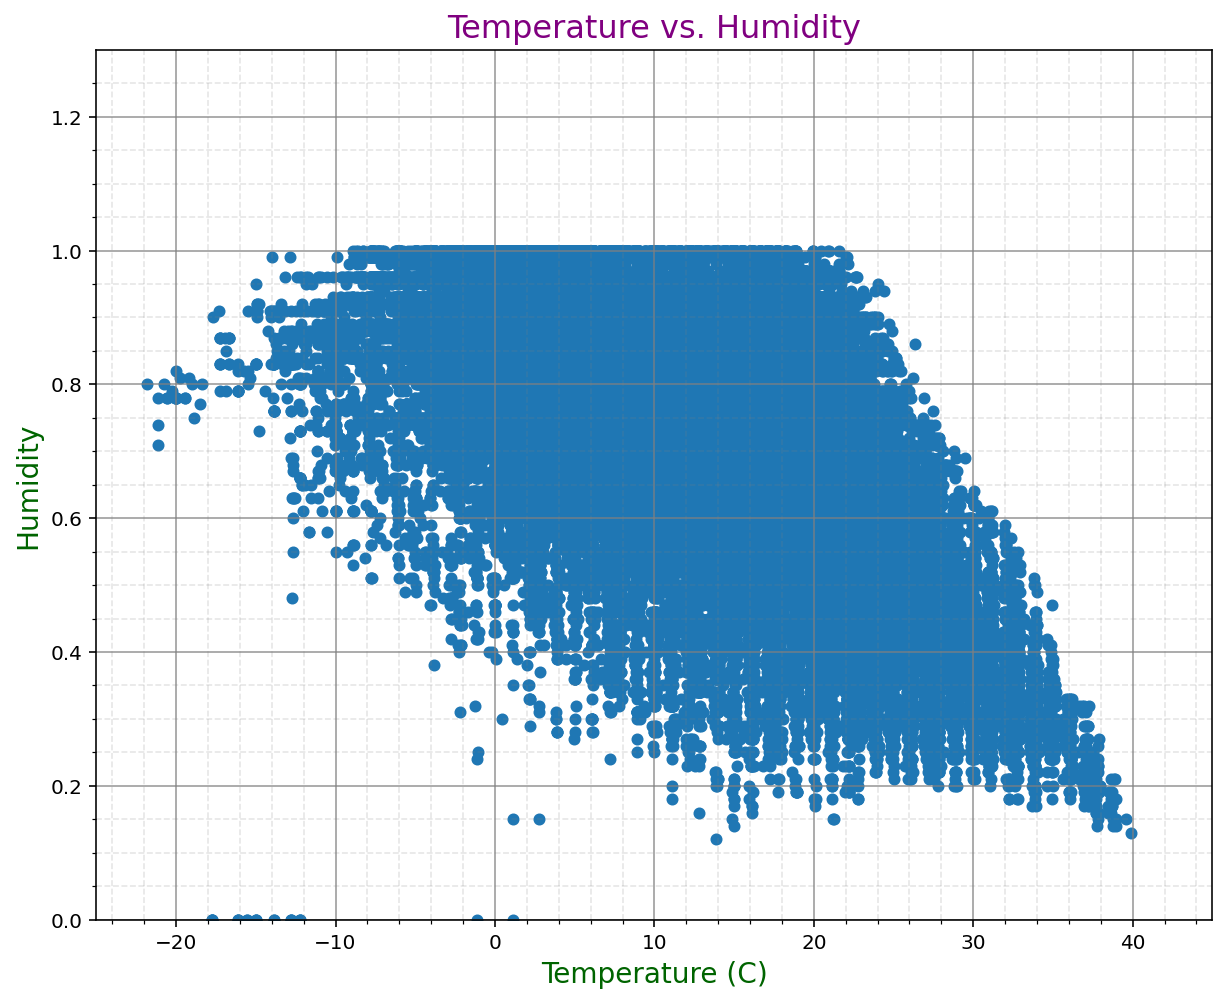

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(-25, 45)
ax.set_ylim(0, 1.3)
ax.scatter(x=df['Temperature (C)'], y=df['Humidity'],s=25)
ax.set_xlabel('Temperature (C)',fontsize=14,color='darkgreen')
ax.set_ylabel('Humidity',fontsize=14,color='darkgreen')
ax.set_title('Temperature vs. Humidity',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [181]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=100,max_depth=50)
kf = KFold(n_splits=10, random_state=1693)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [182]:
X = np.array(df['Apparent Temperature (C)']).reshape(-1,1)
y = np.array(df['Humidity']).reshape(-1,1)
i = 0
PE = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = RF_reg.fit(X_train,y_train)
  model.fit(X_train, y_train)
  yhat =  model.predict(X_test)
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A col

0.14488714306796333

In [183]:
X = np.array(df['Apparent Temperature (C)']).reshape(-1,1)
y = np.array(df['Humidity'])
i = 0
PE = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = RF_reg.fit(X_train,y_train.ravel())
  model.fit(X_train, y_train)
  yhat =  model.predict(X_test)
  PE.append(np.sqrt(mean_squared_error(y_test, yhat)))

np.mean(PE)

0.14462055895950934